In [11]:
import pandas as pd
import os
import joblib
from sklearn.metrics import r2_score, median_absolute_error

In [12]:
trained_rf = joblib.load('mc124_randomforest.joblib')

In [13]:
trained_rf

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      random_state=123)

In [14]:
# Set the search path for files (assuming the directory is relative to the current script)
file_path_mc010 = os.path.join("data_preprocessing", "mc190_fresh_prepped.csv")
df = pd.read_csv(file_path_mc010, parse_dates=['datetime'])

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2203 entries, 0 to 2207
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     2203 non-null   datetime64[ns]
 1   station      2203 non-null   object        
 2   hour         2203 non-null   float64       
 3   day          2203 non-null   float64       
 4   month        2203 non-null   float64       
 5   year         2203 non-null   float64       
 6   day_of_week  2203 non-null   float64       
 7   is_weekend   2203 non-null   float64       
 8   no2          2203 non-null   float64       
 9   no           2203 non-null   float64       
 10  nox          2203 non-null   float64       
 11  pm10         2203 non-null   float64       
 12  pm2.5        2203 non-null   float64       
 13  no2_h-1      2203 non-null   float64       
 14  no_h-1       2203 non-null   float64       
 15  nox_h-1      2203 non-null   float64       
 16  pm10_h-1   

In [15]:
# prep for final testing
features = ['hour', 'day', 'month', 'year', 'day_of_week', 'is_weekend', 'no2_h-1', 'no_h-1', 'nox_h-1', 'pm10_h-1', 'pm2.5_h-1']
df_filtered = df[features]

# make pm10 predictions on new data
y_pred = trained_rf.predict(df_filtered)

# get true value of pm10
y_true = df['pm10']  

In [16]:
# calculate evaluation metrics
mae = median_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Median Absolute Error on new data: {mae}")
print(f"R2 score on new data: {r2}")

Median Absolute Error on new data: 1.328358391083448
R2 score on new data: 0.7964599150123293


In [17]:
median_pm10= df['pm10'].median()
print(f"Median PM10 value: {median_pm10:.2f}")

Median PM10 value: 18.00


In [18]:
# relative deviation in percentage
print("relative absolute median error in percentage: " + str(mae*100/median_pm10) + "%")

relative absolute median error in percentage: 7.379768839352489%


In [19]:
# calculate the possible deviation  range
lower_bound = median_pm10 - mae
upper_bound = median_pm10 + mae

# Print the results
print(f"Median Value: {median_pm10:.2f}")
print(f"Median Absolute Error : {mae:.2f}")
print(f"Possible Deviation Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

Median Value: 18.00
Median Absolute Error : 1.33
Possible Deviation Range: [16.67, 19.33]


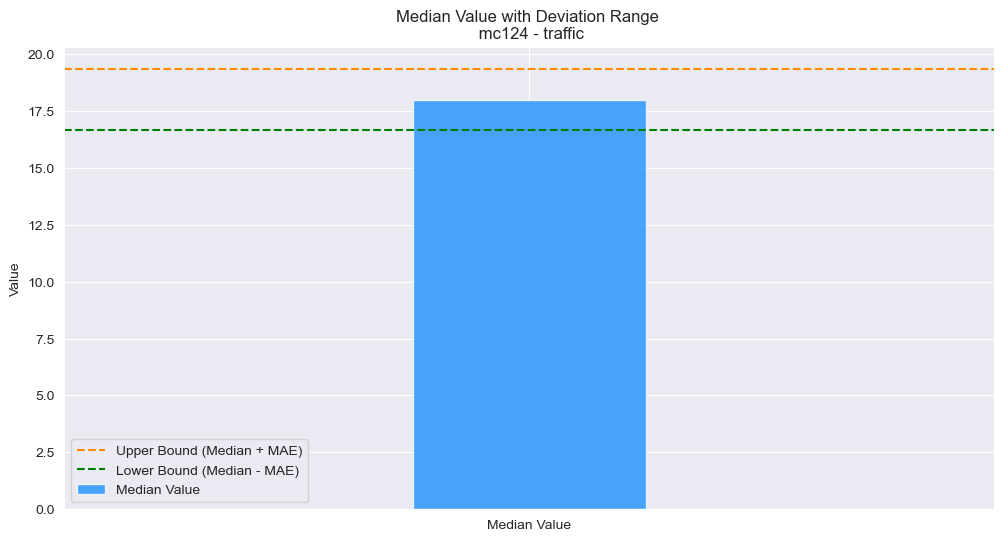

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(12, 6))

plt.bar('Median Value', median_pm10, color='#1E90FF', alpha=0.8, label='Median Value', width=0.5)

# plot the upper and lower bounds as horizontal lines
plt.axhline(y=upper_bound, color='darkorange', linestyle='--', label='Upper Bound (Median + MAE)')
plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound (Median - MAE)')

# add labels and title
plt.ylabel('Value')
plt.title('Median Value with Deviation Range \n mc124 - traffic')
plt.legend()

# set x-limits to give more space on the left and right
plt.xlim(-1, 1) 

# show plot
plt.show()